# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

# Build query URL
query_url = f"{url}&APPID={weather_api_key}"

# Set up empty lists to hold data from call

city_name = []
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
lat = []
lng = []
wind_speed = []

# Create a loop counter

count = 1

# Start of log statement

print(f"Beginning Data Retrieval")
print(f"-----------------------")

# Initialize loop

for city in cities:
    
    try:
        response = requests.get(f"{query_url}&q={city}").json()
    
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        
        current_city = response["name"]
        print(f"Processing Record {count} | {current_city}")
        
        count = count + 1 
    
    except:
        print("City not found...")
    continue
    

Beginning Data Retrieval
-----------------------
Processing Record 1 | Ponta do Sol
Processing Record 2 | Bredasdorp
Processing Record 3 | Kajaani
Processing Record 4 | Riyadh
Processing Record 5 | Faya
Processing Record 6 | Vkhodnoy
Processing Record 7 | Avarua
Processing Record 8 | Rikitea
City not found...
Processing Record 9 | Ushuaia
Processing Record 10 | Ahipara
Processing Record 11 | Tasiilaq
Processing Record 12 | Dikson
Processing Record 13 | Albany
Processing Record 14 | Roald
Processing Record 15 | Srednekolymsk
Processing Record 16 | Qaanaaq
Processing Record 17 | Hilo
Processing Record 18 | Ōarai
Processing Record 19 | Khatanga
Processing Record 20 | Hingorja
Processing Record 21 | Hanna
Processing Record 22 | Margate
City not found...
Processing Record 23 | Narsaq
Processing Record 24 | Sirte
City not found...
Processing Record 25 | Scarborough
Processing Record 26 | Yellowknife
Processing Record 27 | San Patricio
City not found...
Processing Record 28 | Nanortalik
Proce

Processing Record 235 | San Borja
City not found...
Processing Record 236 | Kaitangata
City not found...
Processing Record 237 | Glendive
Processing Record 238 | Vestmannaeyjar
Processing Record 239 | Gimbi
City not found...
Processing Record 240 | Ufa
Processing Record 241 | La Ronge
City not found...
Processing Record 242 | Capinópolis
Processing Record 243 | Boddam
Processing Record 244 | Ostrovnoy
City not found...
Processing Record 245 | Chumikan
Processing Record 246 | Nuquí
Processing Record 247 | Hofn
Processing Record 248 | Belyy Yar
Processing Record 249 | São Filipe
Processing Record 250 | Kazanskaya
Processing Record 251 | Strezhevoy
Processing Record 252 | Troitskoye
Processing Record 253 | Kenitra
City not found...
Processing Record 254 | Coolum Beach
Processing Record 255 | Meulaboh
Processing Record 256 | Hualmay
Processing Record 257 | Adrar
Processing Record 258 | Riverton
Processing Record 259 | Nemuro
Processing Record 260 | Ovruch
Processing Record 261 | Salalah
Pr

Processing Record 473 | Sinnamary
Processing Record 474 | Kamina
Processing Record 475 | Canmore
Processing Record 476 | Ladário
Processing Record 477 | Trelew
Processing Record 478 | Wanning
Processing Record 479 | Nishihara
Processing Record 480 | Ulladulla
Processing Record 481 | Moerai
Processing Record 482 | Chifeng
Processing Record 483 | Rome
Processing Record 484 | Virginia Beach
Processing Record 485 | San Ignacio
Processing Record 486 | Gari
Processing Record 487 | Oranjestad
Processing Record 488 | Khasan
Processing Record 489 | Leh
Processing Record 490 | Lapeer
Processing Record 491 | Narón
Processing Record 492 | Río Gallegos
Processing Record 493 | Egvekinot
Processing Record 494 | Halifax
Processing Record 495 | Berlevåg
Processing Record 496 | Eagle Pass
Processing Record 497 | Nioki
Processing Record 498 | Sarab
Processing Record 499 | Bhanjanagar
Processing Record 500 | Kungurtug
Processing Record 501 | Lata
Processing Record 502 | Kanniyākumāri
Processing Record 503

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create dictionary with weather city data

weather_dict = {
    "City": city_name,
    "Country": country,
    "Latitude": lat,
    "Longtitude": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Date": date
}

# Convert dictionary to dataframe

weatherpy_data = pd.DataFrame(weather_dict)

weatherpy_data.to_csv('output_data/cities.csv')

weatherpy_data.head()

,City,Country,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Ponta do Sol,PT,32.6667,-17.1000,60.01,77,84,1.01,1613009172
1,Bredasdorp,ZA,-34.5322,20.0403,62.60,94,1,2.30,1613009172
2,Kajaani,FI,64.2273,27.7285,-14.80,76,75,1.14,1613009172
3,Riyadh,SA,24.6877,46.7219,55.40,44,0,2.39,1613009101
4,Faya,SA,18.3851,42.4509,50.00,81,0,1.30,1613009172


In [6]:
# Display dataframe stats with describe function

weatherpy_data.describe()

,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,22.555758,16.056167,46.051588,73.948905,50.622263,7.679653,1.613009e+09
std,33.229837,90.067678,32.468591,18.512142,40.788768,6.086911,7.508246e+01
min,-54.800000,-179.166700,-36.400000,18.000000,0.000000,0.160000,1.613009e+09
25%,-4.150025,-64.157100,22.860000,65.000000,3.000000,3.440000,1.613009e+09
50%,29.668300,22.904000,57.305000,78.000000,42.500000,5.750000,1.613009e+09
75%,50.348825,93.770825,73.005000,87.000000,94.000000,10.360000,1.613009e+09
max,78.218600,179.316700,93.200000,100.000000,100.000000,34.290000,1.613009e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weatherpy_data = weatherpy_data[weatherpy_data["Humidity"] <= 100]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

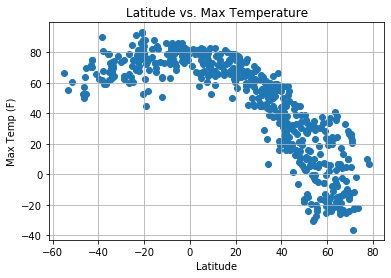

In [8]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Max Temp']
plt.scatter(x_values, y_values)

plt.title("Latitude vs. Max Temperature")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latmaxtemp.png")

plt.show()

## Latitude vs. Humidity Plot

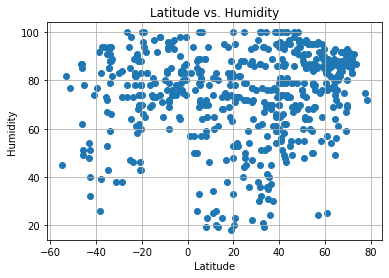

In [9]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Humidity']
plt.scatter(x_values, y_values)

plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/lathumidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

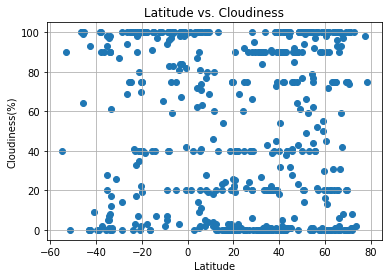

In [10]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Cloudiness']
plt.scatter(x_values, y_values)

plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latcloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

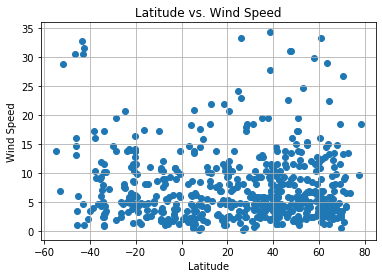

In [11]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Wind Speed']
plt.scatter(x_values, y_values)

plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latwindspeed.png")

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
x_valuesn = weatherpy_data[['Latitude'] > 0]
y_values = weatherpy_data['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valuesn, y_values)
regress_values = x_valuesn * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_valuesn,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Max Temperature (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latmaxtempregression_north.png")

plt.show()

TypeError: '>' not supported between instances of 'list' and 'int'

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6303989098717053


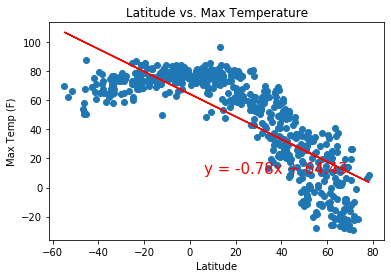

<Figure size 432x288 with 0 Axes>

In [12]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latmaxtempregression_south.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.003370961679103496


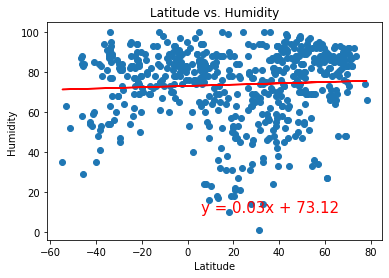

<Figure size 432x288 with 0 Axes>

In [13]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/lathumidityregression_north.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.003370961679103496


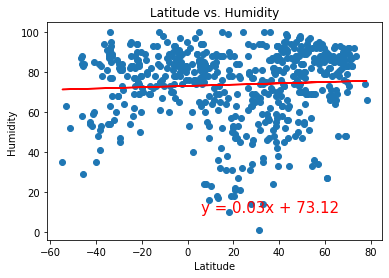

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/lathumidityregression_south.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07815616015590084


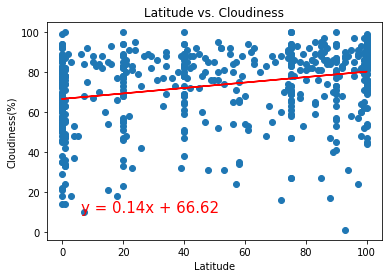

<Figure size 432x288 with 0 Axes>

In [15]:
x_values = weatherpy_data['Cloudiness']
y_values = weatherpy_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latcloudinessregression_north.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07815616015590084


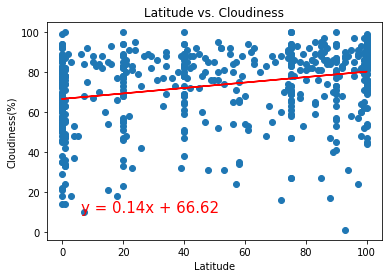

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = weatherpy_data['Cloudiness']
y_values = weatherpy_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latcloudinessregression_south.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0006213783408731376


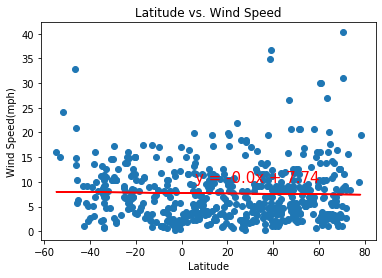

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latwindregression_north.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0006213783408731376


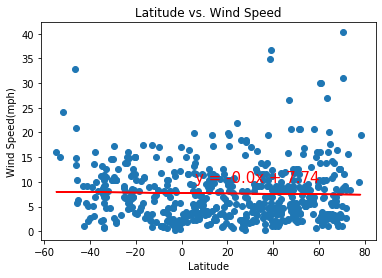

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latwindregression_south.png")

plt.show()